[Problem 1] Number of wheat on a 2 x 2 square chessboard



In [1]:
import numpy as np

# Define a function to calculate wheat on the chessboard
def calculate_wheat_on_chessboard(n, m):
    board = np.array([[2**(i+j) for j in range(m)] for i in range(n)])
    return board

# Calculate wheat on a 2x2 chessboard
result_problem_1 = calculate_wheat_on_chessboard(2, 2)
print(result_problem_1)


[[1 2]
 [2 4]]


[Problem 2] Expansion to n × m mass



In [2]:
# Function to calculate wheat on an n x m chessboard using np.append()
def calculate_wheat_append(n, m):
    board = np.array([1])
    for _ in range(n * m - 1):
        board = np.append(board, 2 * board[-1])
    return board.reshape((n, m))

# Function to calculate wheat on an n x m chessboard using broadcast
def calculate_wheat_broadcast(n, m):
    indices = np.arange(n * m)
    board = 2 ** indices
    return board.reshape((n, m))

# Calculate wheat on an 8x8 chessboard using both methods
result_problem_2_append = calculate_wheat_append(8, 8)
result_problem_2_broadcast = calculate_wheat_broadcast(8, 8)

print(result_problem_2_append)
print(result_problem_2_broadcast)


[[                   1                    2                    4
                     8                   16                   32
                    64                  128]
 [                 256                  512                 1024
                  2048                 4096                 8192
                 16384                32768]
 [               65536               131072               262144
                524288              1048576              2097152
               4194304              8388608]
 [            16777216             33554432             67108864
             134217728            268435456            536870912
            1073741824           2147483648]
 [          4294967296           8589934592          17179869184
           34359738368          68719476736         137438953472
          274877906944         549755813888]
 [       1099511627776        2199023255552        4398046511104
         8796093022208       17592186044416       3518437208

/tmp/ipykernel_10558/3841446777.py:5: RuntimeWarning: overflow encountered in scalar multiply
  board = np.append(board, 2 * board[-1])


[Problem 3] Total number of wheat

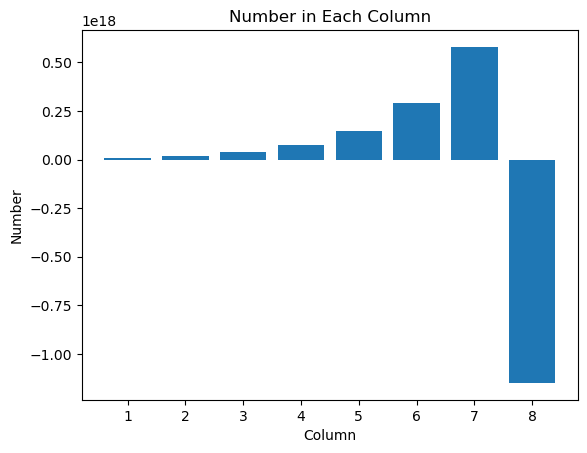

Total number of wheat on an 8x8 chessboard: -1


In [3]:
# Calculate the total number of wheat on an 8x8 chessboard
total_wheat = np.sum(result_problem_2_broadcast)

# Calculate the average of each column
average_column = np.mean(result_problem_2_broadcast, axis=0)

# Visualize the average in a bar chart
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("Column")
plt.ylabel("Number")
plt.title("Number in Each Column")
plt.bar(np.arange(1, 9), average_column)
plt.show()

print(f"Total number of wheat on an 8x8 chessboard: {total_wheat}")


[Problem 4] Heat map of the number of wheat



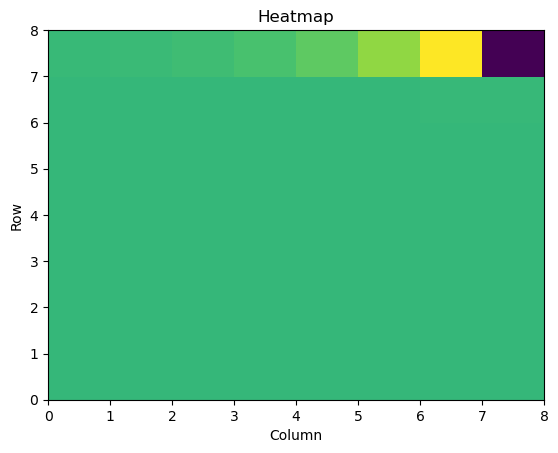

In [4]:
# Visualize the number of wheat on an 8x8 chessboard as a heat map
plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Heatmap")
plt.pcolor(result_problem_2_broadcast)
plt.show()


[Problem 5] How many times is the second half as long as the first half?



In [5]:
# Calculate the number of wheat in the first half and second half
first_half = np.sum(result_problem_2_broadcast[:4, :])
second_half = np.sum(result_problem_2_broadcast[4:, :])

# Find how many times the second half is greater than the first half
times_greater = second_half / first_half
print(f"The second half is {times_greater} times greater than the first half.")


The second half is -1.0000000002328306 times greater than the first half.


[Problem 6] Expansion to n × m mass by another calculation method

In [6]:
# Function to calculate wheat on an n x m chessboard using np.append()
def calculate_wheat_append_another(n, m):
    indices = np.arange(n * m)
    board = np.append([1], 2**indices[:-1])
    return board.reshape((n, m))

# Function to calculate wheat on an n x m chessboard using broadcast
def calculate_wheat_broadcast_another(n, m):
    indices = np.arange(n * m)
    board = 2 ** indices
    return board.reshape((n, m))

# Calculate wheat on an 8x8 chessboard using both methods
result_problem_6_append = calculate_wheat_append_another(8, 8)
result_problem_6_broadcast = calculate_wheat_broadcast_another(8, 8)

print(result_problem_6_append)
print(result_problem_6_broadcast)


[[                  1                   1                   2
                    4                   8                  16
                   32                  64]
 [                128                 256                 512
                 1024                2048                4096
                 8192               16384]
 [              32768               65536              131072
               262144              524288             1048576
              2097152             4194304]
 [            8388608            16777216            33554432
             67108864           134217728           268435456
            536870912          1073741824]
 [         2147483648          4294967296          8589934592
          17179869184         34359738368         68719476736
         137438953472        274877906944]
 [       549755813888       1099511627776       2199023255552
        4398046511104       8796093022208      17592186044416
       35184372088832      70368744177664

[Problem 7] Comparing calculation times



In [7]:
# Measure calculation times using %%timeit

# Using np.append()
%timeit calculate_wheat_append(8, 8)

# Using broadcast
%timeit calculate_wheat_broadcast(8, 8)

# Another np.append() method
%timeit calculate_wheat_append_another(8, 8)

# Another broadcast method
%timeit calculate_wheat_broadcast_another(8, 8)


/tmp/ipykernel_10558/3841446777.py:5: RuntimeWarning: overflow encountered in scalar multiply
  board = np.append(board, 2 * board[-1])


215 µs ± 8.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.8 µs ± 12.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
6.4 µs ± 93.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.84 µs ± 17.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
